In [1]:
import pandas as pd
df = pd.read_csv('data_banknote_authentication.txt', header=None)
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df.columns = cols

In [2]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


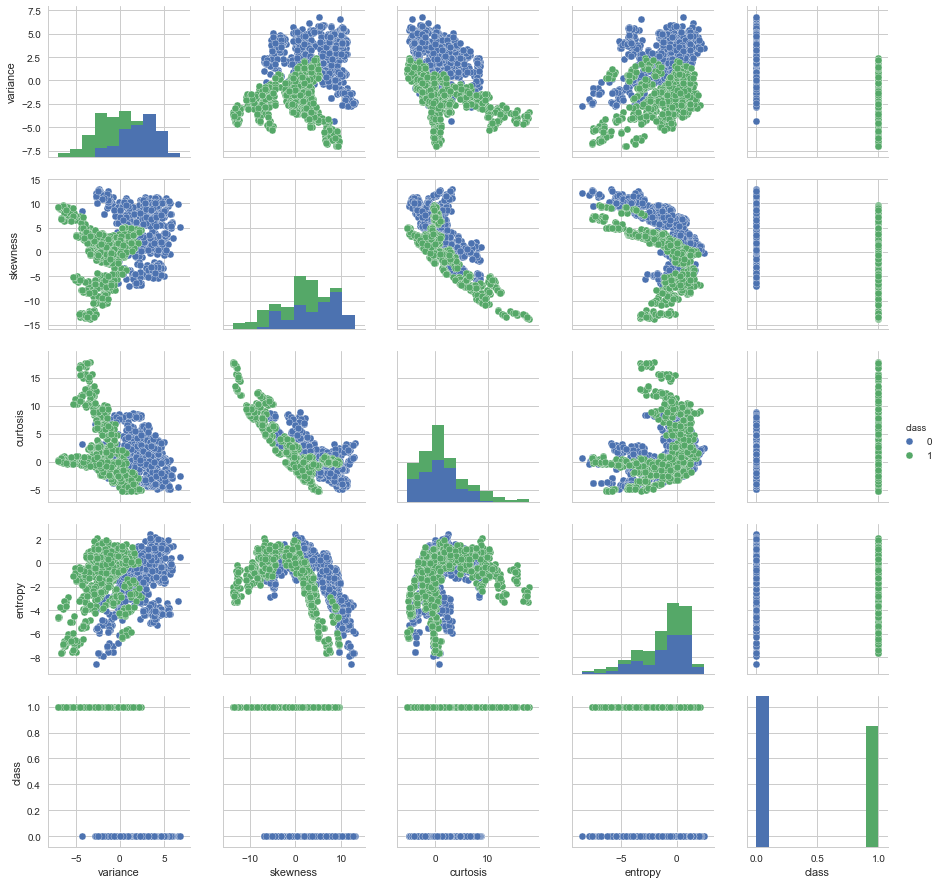

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df.dropna(), size =2.5, hue = 'class')

In [6]:
X = df[['variance','curtosis']].values
y = df['class'].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.33)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
ppn = Perceptron(penalty='l2', alpha=0.01, max_iter=100, shuffle=True, eta0=0.1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.01, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty='l2', random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
ppn.score(X_test,y_test)

0.7991169977924945

In [12]:
import numpy as np

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)


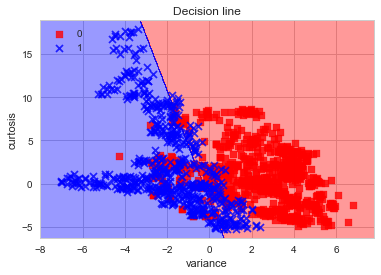

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('variance')
plt.ylabel('curtosis')
plt.title('Decision line')
plt.legend(loc='upper left')
plt.show()